In [1]:
from time import time

from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType
from HARK.ConsumptionSaving.ConsPortfolioModel import (
    PortfolioConsumerType,
    init_portfolio,
)
from HARK.ConsumptionSaving.ConsRiskyAssetModel import RiskyAssetConsumerType
from HARK.utilities import plot_funcs_der, plot_funcs


In [2]:
mystr = lambda number: "{:.4f}".format(number)


In [3]:
# Make and solve an example consumer with idiosyncratic income shocks
IndShockExample = IndShockConsumerType()
IndShockExample.cycles = 0  # Make this type have an infinite horizon


In [4]:
start_time = time()
IndShockExample.solve()
end_time = time()
print(
    "Solving a consumer with idiosyncratic shocks took "
    + mystr(end_time - start_time)
    + " seconds."
)
IndShockExample.unpack("cFunc")


GPFRaw                 = 0.984539 
GPFNrm                 = 0.993777 
GPFAggLivPrb           = 0.964848 
Thorn = APF            = 0.994384 
PermGroFacAdj          = 1.000611 
uInvEpShkuInv          = 0.990704 
VAF                    = 0.932054 
WRPF                   = 0.213705 
DiscFacGPFNrmMax       = 0.972061 
DiscFacGPFAggLivPrbMax = 1.010600 


Solving a consumer with idiosyncratic shocks took 0.4836 seconds.


Concave consumption function:


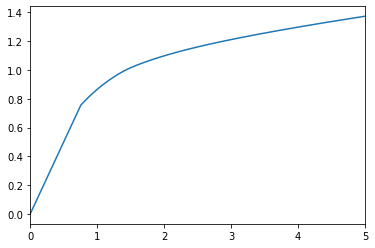

Marginal consumption function:


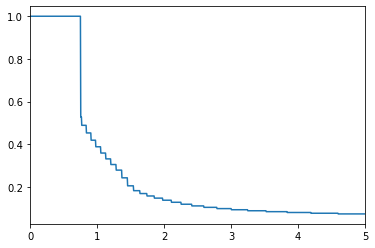

In [5]:
# Plot the consumption function and MPC for the infinite horizon consumer
print("Concave consumption function:")
plot_funcs(IndShockExample.cFunc[0], IndShockExample.solution[0].mNrmMin, 5)
print("Marginal consumption function:")
plot_funcs_der(IndShockExample.cFunc[0], IndShockExample.solution[0].mNrmMin, 5)


In [6]:
# Make and solve an example consumer with risky returns to savings
init_risky = init_portfolio.copy()
init_risky["PortfolioBool"] = False
RiskyReturnExample = RiskyAssetConsumerType(**init_risky)
RiskyReturnExample.cycles = 0  # Make this type have an infinite horizon


In [7]:
start_time = time()
RiskyReturnExample.solve()
end_time = time()
print(
    "Solving a consumer with risky returns took "
    + mystr(end_time - start_time)
    + " seconds."
)
RiskyReturnExample.unpack("cFunc")


Solving a consumer with risky returns took 0.5352 seconds.


Concave consumption function:


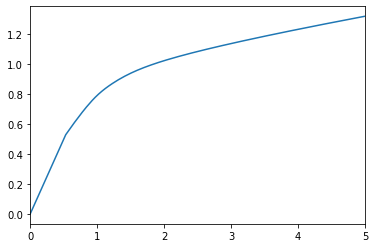

Marginal consumption function:


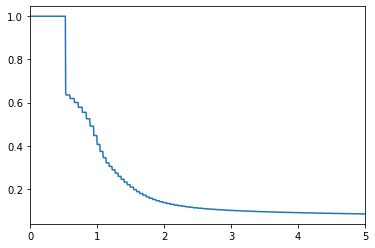

In [8]:
# Plot the consumption function and MPC for the risky asset consumer
print("Concave consumption function:")
plot_funcs(RiskyReturnExample.cFunc[0], RiskyReturnExample.solution[0].mNrmMin, 5)
print("Marginal consumption function:")
plot_funcs_der(RiskyReturnExample.cFunc[0], RiskyReturnExample.solution[0].mNrmMin, 5)


Consumption functions for idiosyncratic shocks vs risky returns vs portfolio choice:


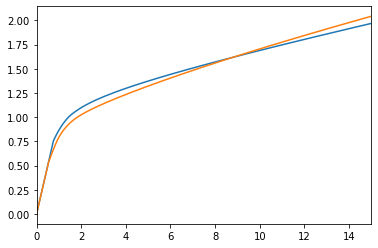

In [9]:
# Compare the consumption functions for the various agents in this notebook.
print(
    "Consumption functions for idiosyncratic shocks vs risky returns vs portfolio choice:"
)
plot_funcs(
    [
        IndShockExample.cFunc[0],
        RiskyReturnExample.cFunc[0],
    ],
    IndShockExample.solution[0].mNrmMin,
    15,
)


In [10]:
# Make and solve an example consumer with a portfolio choice
init_portfolio["PortfolioBool"] = True
PortfolioChoiceExample = RiskyAssetConsumerType(**init_portfolio)
PortfolioChoiceExample.cycles = 0  # Make this type have an infinite horizon


In [11]:
start_time = time()
PortfolioChoiceExample.solve()
end_time = time()
print(
    "Solving a consumer with risky returns and portfolio choice took "
    + mystr(end_time - start_time)
    + " seconds."
)
PortfolioChoiceExample.unpack("cFunc")
PortfolioChoiceExample.unpack("ShareFunc")


Solving a consumer with risky returns and portfolio choice took 0.8322 seconds.


Concave consumption function:


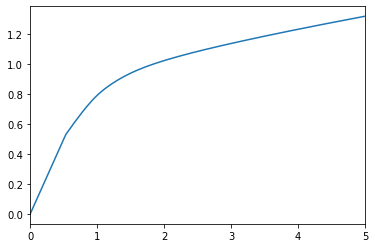

Marginal consumption function:


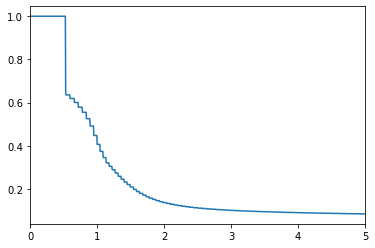

In [12]:
# Plot the consumption function and MPC for the portfolio choice consumer
print("Concave consumption function:")
plot_funcs(
    PortfolioChoiceExample.cFunc[0], PortfolioChoiceExample.solution[0].mNrmMin, 5
)
print("Marginal consumption function:")
plot_funcs_der(
    PortfolioChoiceExample.cFunc[0], PortfolioChoiceExample.solution[0].mNrmMin, 5
)


Consumption functions for idiosyncratic shocks vs risky returns vs portfolio choice:


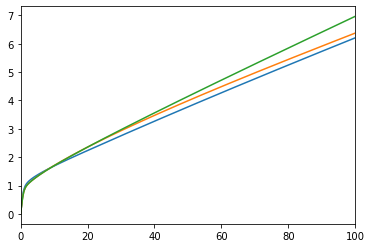

In [13]:
# Compare the consumption functions for the various agents in this notebook.
print(
    "Consumption functions for idiosyncratic shocks vs risky returns vs portfolio choice:"
)
plot_funcs(
    [
        IndShockExample.cFunc[0],
        RiskyReturnExample.cFunc[0],
        PortfolioChoiceExample.cFunc[0],
    ],
    IndShockExample.solution[0].mNrmMin,
    100,
)


In [14]:
# Make and solve an example consumer with a portfolio choice
init_portfolio["PortfolioBool"] = True
PortfolioTypeExample = PortfolioConsumerType(**init_portfolio)
PortfolioTypeExample.cycles = 0  # Make this type have an infinite horizon


In [15]:
start_time = time()
PortfolioTypeExample.solve()
end_time = time()
print(
    "Solving a consumer with portfolio choice took "
    + mystr(end_time - start_time)
    + " seconds."
)
PortfolioTypeExample.unpack("cFuncAdj")
PortfolioTypeExample.unpack("ShareFuncAdj")


Solving a consumer with portfolio choice took 3.7537 seconds.


Concave consumption function:


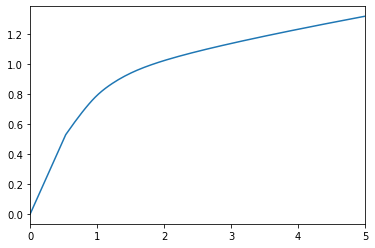

Marginal consumption function:


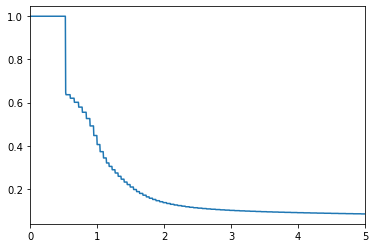

In [16]:
# Plot the consumption function and MPC for the portfolio choice consumer
print("Concave consumption function:")
plot_funcs(PortfolioTypeExample.cFuncAdj[0], 0, 5)
print("Marginal consumption function:")
plot_funcs_der(PortfolioTypeExample.cFuncAdj[0], 0, 5)


Consumption functions for portfolio choice type vs risky asset with portfolio choice:


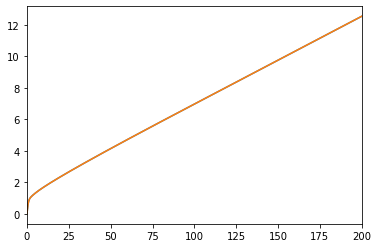

In [17]:
# Compare the consumption functions for the various portfolio choice types.
print(
    "Consumption functions for portfolio choice type vs risky asset with portfolio choice:"
)
plot_funcs([PortfolioTypeExample.cFuncAdj[0], PortfolioChoiceExample.cFunc[0]], 0, 200)


Share functions for portfolio choice type vs risky asset with portfolio choice:


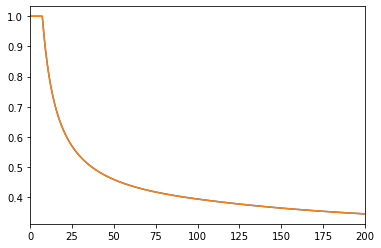

In [18]:
# Compare the share functions for the various portfolio choice types.
print("Share functions for portfolio choice type vs risky asset with portfolio choice:")
plot_funcs(
    [PortfolioTypeExample.ShareFuncAdj[0], PortfolioChoiceExample.ShareFunc[0]], 0, 200
)


In [19]:
from HARK.ConsumptionSaving.ConsRiskyAssetModel import (
    RiskyReturnGivenFixedPortfolioShareType,
)


In [25]:
FixedShareExample = RiskyReturnGivenFixedPortfolioShareType()
FixedShareExample.cycles = 0


In [26]:
start_time = time()
FixedShareExample.solve()
end_time = time()
print(
    "Solving a consumer with fixed portfolio share took "
    + mystr(end_time - start_time)
    + " seconds."
)
FixedShareExample.unpack("cFunc")


Solving a consumer with fixed portfolio share took 2.8314 seconds.


Consumption functions for portfolio choice type vs risky asset with portfolio choice:


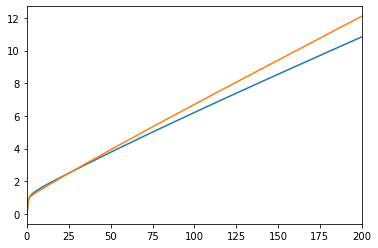

In [28]:
# Compare the consumption functions for the various portfolio choice types.
print(
    "Consumption functions for portfolio choice type vs risky asset with portfolio choice:"
)
plot_funcs([IndShockExample.cFunc[0], FixedShareExample.cFunc[0]], 0, 200)
